In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
from formulas import calculate_fv, calcualte_w1

In [3]:
age_now = 32
age_retirement = 60
age_death = 90

annual_inflation = 0.02
annual_return = 0.07

capital_initial = 5000
savings_monthly = 200

# Accumulation

In [9]:
fv = calculate_fv(c0=capital_initial, r=annual_return, p=savings_monthly*12, N=age_retirement-age_now)
fv

226918.6500046244

In [6]:
capital_years_acc = []
age_years_acc = []
for age in range(age_now+1, age_retirement+1):
  # saved at 32 to have money at 33; saved at 59 to have capital at 60
  capital = calculate_fv(c0=capital_initial, r=annual_return, p=savings_monthly*12, N=age-age_now)
  capital_years_acc.append(capital)
  age_years_acc.append(age)
  #print(f"age: {age}, capital: {int(capital)}" )

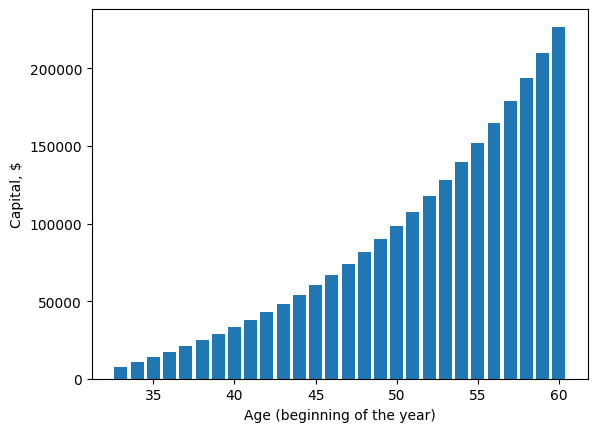

In [7]:
plt.bar(x=age_years_acc, height=capital_years_acc)
plt.ylabel("Capital, $")
plt.xlabel("Age (beginning of the year)")
plt.show()

# Withdrawal

In [11]:
W = calcualte_w1(c0=fv, r=annual_return, i=annual_inflation, N=age_death-age_retirement)
W_todays  = W / (1 + annual_inflation) ** (age_retirement - age_now)
print(f"today monthly: {int(W_todays/12)}")

capital_years_ret = []
age_years_ret = []

year_prev = fv
for age in range(age_retirement+1, age_death+1):
  year_w = W * ( 1+ annual_inflation) ** (age-age_retirement-1)
  year_this = (year_prev - year_w) * (1 + annual_return)
  capital_years_ret.append(year_this)
  age_years_ret.append(age)
  # print(f"age: {age}, withdrawal: {int(year_w)}, capital: {int(year_this)}" )
  year_prev = year_this

today monthly: 666


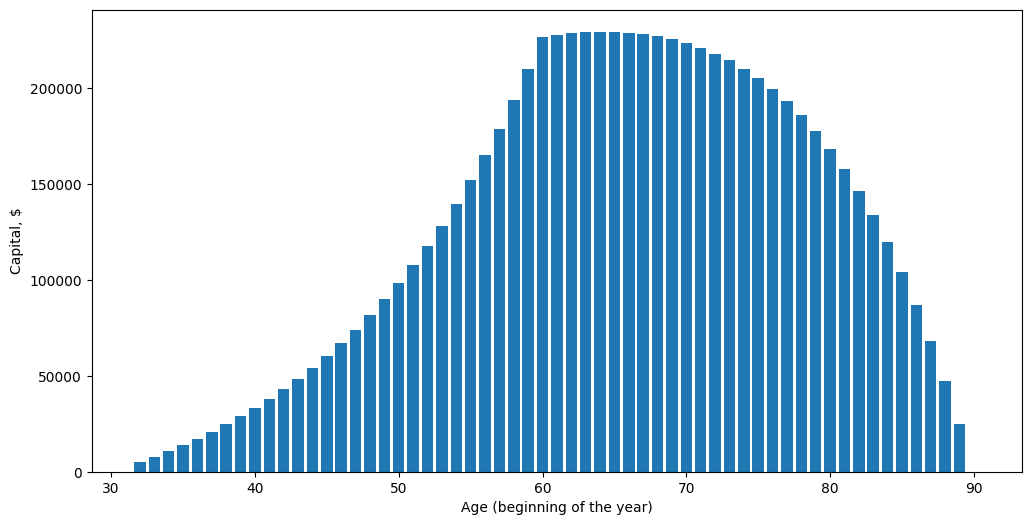

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(x=[age_now]+age_years_acc+age_years_ret, height=[capital_initial]+capital_years_acc+capital_years_ret)
plt.ylabel("Capital, $")
plt.xlabel("Age (beginning of the year)")
plt.show()